In [2]:
# Importing all Packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

%matplotlib inline

In [3]:
# Loading Data
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
drivers = pd.read_csv('drivers.csv')
constructors = pd.read_csv('constructors.csv')

In [4]:
# Merging Datasets 1
df = pd.merge(results , races [['raceId', 'year', 'name', 'round', ]], on = 'raceId', how ='left')

In [5]:
# Merging Datasets 2
df = pd.merge(df, drivers [['driverId', 'driverRef', 'nationality' ]], on = 'driverId', how ='left')

In [6]:
# Merging Datasets 3
df = pd.merge(df, constructors [['constructorId', 'name', 'nationality' ]], on = 'constructorId', how ='left')

In [7]:
df.head(5)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [8]:
# Drop Unecessary Columns
df.drop(['number', 'position', 'positionText', 'laps', 'statusId', 'resultId','raceId', 'driverId', 'constructorId' ], axis=1, inplace = True)

In [9]:
# Rename Columns
df.rename(columns={'rank':'fastestLapRank', 'name_x':'gpName','nationality_x':'driverNationality', 'name_y':'constructorName', 'nationality_y':'constructorNationality', 'driverRef':'driver'}, inplace=True)

In [10]:
# Rearrange Columns
df = df[['year', 'gpName', 'round', 'driver', 'constructorName', 'grid', 'positionOrder', 'points', 'time', 'milliseconds', 'fastestLapRank', 'fastestLapTime', 'fastestLapSpeed', 'driverNationality', 'constructorNationality']]

In [11]:
# Display Updated Data
df.head(5)

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,Finnish,British


In [12]:
# Drop Season 2023 (Ongoing)
df = df[df['year']!=2023]

In [13]:
# Sorting Results
df = df.sort_values(by=['year', 'round', 'positionOrder'], ascending= [False, True, True])

In [14]:
# Display Updated Data
df.head(10)

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
25400,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584,1,1:34.570,206.018,Monegasque,Italian
25401,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182,3,1:35.740,203.501,Spanish,Italian
25402,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259,5,1:36.228,202.469,British,German
25403,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795,6,1:36.302,202.313,British,German
25404,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338,8,1:36.623,201.641,Danish,American
25405,2022,Bahrain Grand Prix,1,bottas,Alfa Romeo,6,6,8.0,+16.119,5869703,7,1:36.599,201.691,Finnish,Swiss
25406,2022,Bahrain Grand Prix,1,ocon,Alpine F1 Team,11,7,6.0,+19.423,5873007,14,1:37.110,200.630,French,French
25407,2022,Bahrain Grand Prix,1,tsunoda,AlphaTauri,16,8,4.0,+20.386,5873970,13,1:37.104,200.642,Japanese,Italian
25408,2022,Bahrain Grand Prix,1,alonso,Alpine F1 Team,8,9,2.0,+22.390,5875974,10,1:36.733,201.412,Spanish,French
25409,2022,Bahrain Grand Prix,1,zhou,Alfa Romeo,15,10,1.0,+23.064,5876648,9,1:36.685,201.512,Chinese,Swiss


In [15]:
# Replace \N values in Datatset
df.time.replace('\\N', np.nan, inplace=True)
df.milliseconds.replace('\\N', np.nan, inplace=True)
df.fastestLapRank.replace('\\N', np.nan, inplace=True)
df.fastestLapSpeed.replace('\\N', np.nan, inplace=True)
df.fastestLapTime.replace('\\N', np.nan, inplace=True)

In [16]:
# Changing Datatypes
df.milliseconds = df.milliseconds.astype(float)
df.fastestLapRank = df.fastestLapRank.astype(float)
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)

In [17]:
# Reset Index
df.reset_index(drop=True, inplace=True)

In [18]:
# Shape
df.shape

(25840, 15)

In [19]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    25840 non-null  int64  
 1   gpName                  25840 non-null  object 
 2   round                   25840 non-null  int64  
 3   driver                  25840 non-null  object 
 4   constructorName         25840 non-null  object 
 5   grid                    25840 non-null  int64  
 6   positionOrder           25840 non-null  int64  
 7   points                  25840 non-null  float64
 8   time                    7088 non-null   object 
 9   milliseconds            7087 non-null   float64
 10  fastestLapRank          7591 non-null   float64
 11  fastestLapTime          7379 non-null   object 
 12  fastestLapSpeed         7379 non-null   float64
 13  driverNationality       25840 non-null  object 
 14  constructorNationality  25840 non-null

In [20]:
# Updated Dataset 
df.head(5)

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584.0,1.0,1:34.570,206.018,Monegasque,Italian
1,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182.0,3.0,1:35.740,203.501,Spanish,Italian
2,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259.0,5.0,1:36.228,202.469,British,German
3,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795.0,6.0,1:36.302,202.313,British,German
4,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338.0,8.0,1:36.623,201.641,Danish,American


In [21]:
# Setting Figure Size and Color
sb.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

([], [])

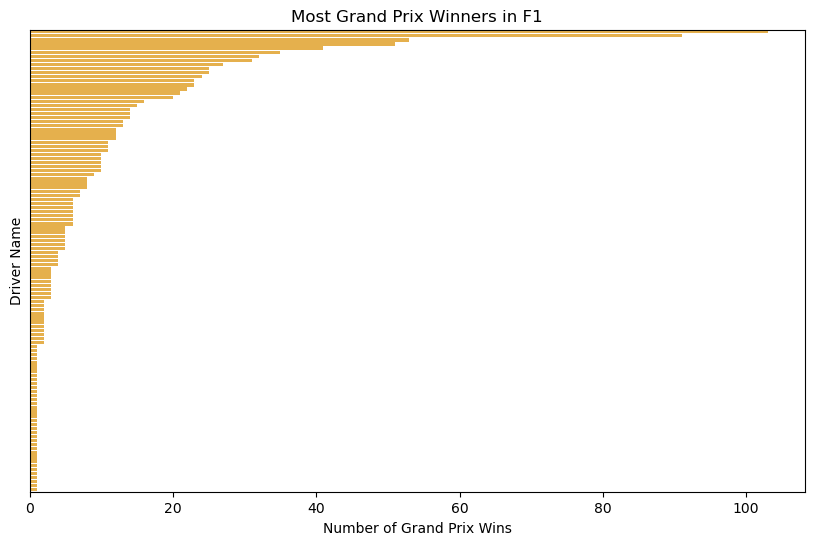

In [48]:
# GP Winners
driverWinner = df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

# Bar Plot
sb.barplot(data=driverWinner, y='driver', x='positionOrder', color='orange', alpha=0.8)
plt.title('Most Grand Prix Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of Grand Prix Wins')
plt.yticks([])

In [23]:
# Create a Smaller Dataset for top 10 GP Winners
top10Drivers = driverWinner.head(10)
print(top10Drivers)

               driver  positionOrder
0            hamilton            103
1  michael_schumacher             91
2              vettel             53
3               prost             51
4               senna             41
5      max_verstappen             35
6              alonso             32
7             mansell             31
8             stewart             27
9               clark             25


Text(0.5, 0, 'Number of Grand Prix Wins')

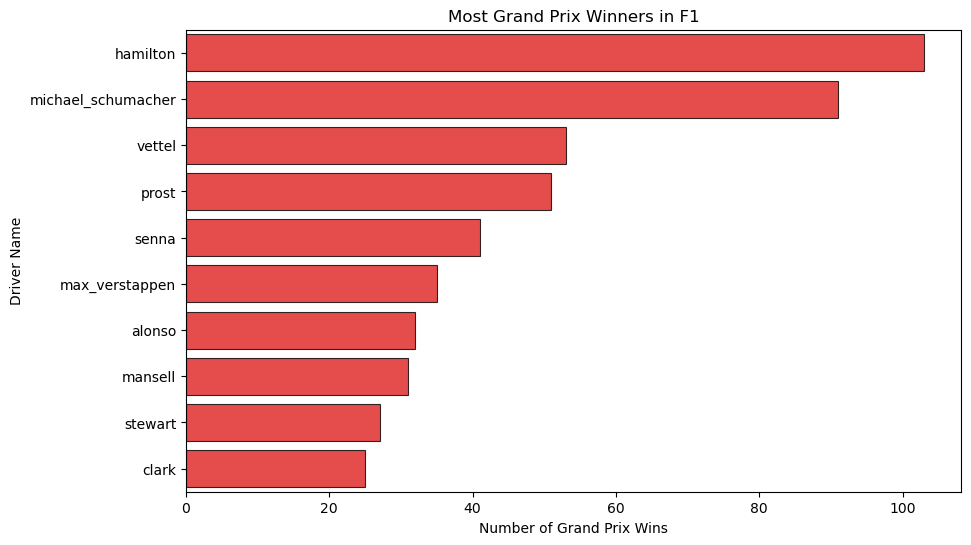

In [24]:
# Top 10 GP Winners Bar Plot
sb.barplot(data=top10Drivers, y='driver', x='positionOrder', color='red', alpha=0.8, linewidth=0.8, edgecolor='black')
plt.title('Most Grand Prix Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of Grand Prix Wins')

([], [])

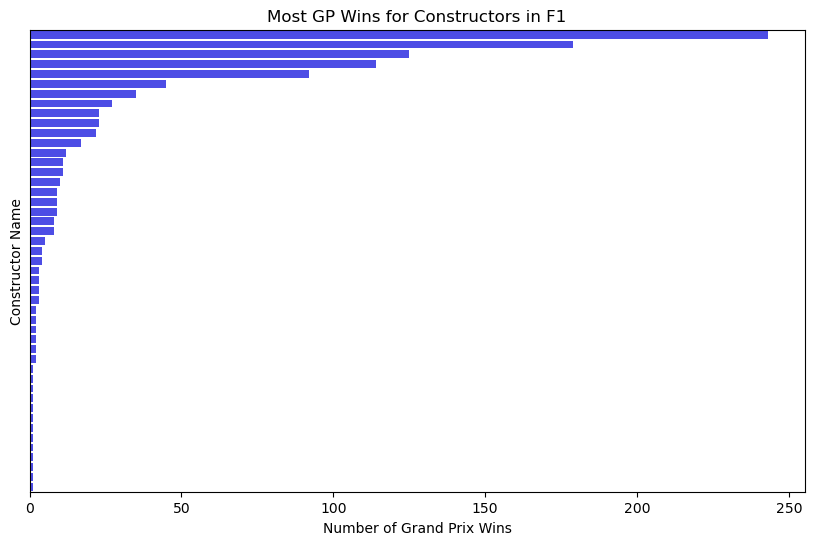

In [25]:
# Constructors Winners
constructorWinner = df.loc[df['positionOrder']==1].groupby('constructorName')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

# Bar Plot
sb.barplot(data=constructorWinner, y='constructorName', x='positionOrder', color='blue', alpha=0.8)
plt.title('Most GP Wins for Constructors in F1')
plt.ylabel('Constructor Name')
plt.xlabel('Number of Grand Prix Wins')
plt.yticks([])

In [27]:
# Create a Smaller Dataframe for top 10 GP Constructor Winners
top10Constructors = constructorWinner.head(10)
print(top10Constructors)

  constructorName  positionOrder
0         Ferrari            243
1         McLaren            179
2        Mercedes            125
3        Williams            114
4        Red Bull             92
5      Team Lotus             45
6         Renault             35
7        Benetton             27
8         Brabham             23
9         Tyrrell             23


Text(0.5, 0, 'Number of Wins')

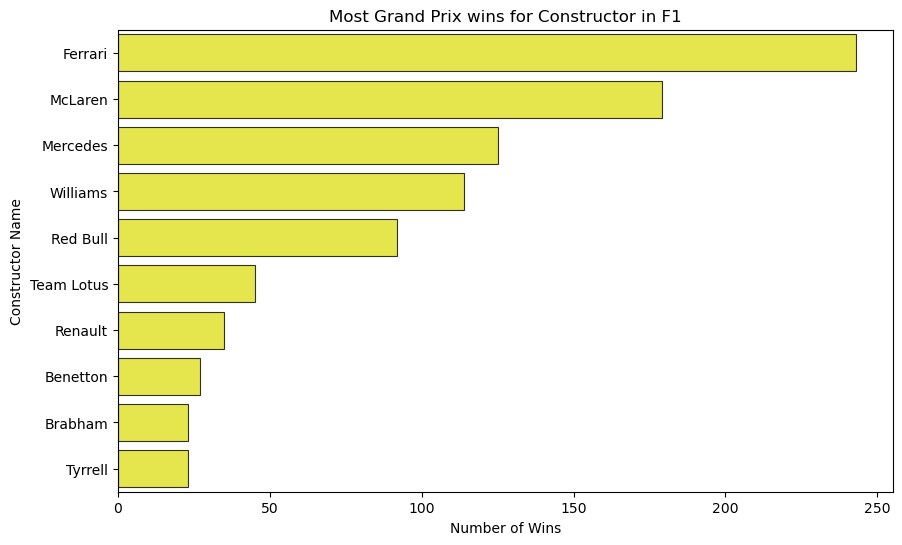

In [29]:
# Top 10 GP Constructor Winners Bar Plot
sb.barplot(data=top10Constructors, y='constructorName', x='positionOrder', color='yellow', alpha=0.8, linewidth=0.8, edgecolor='black')
plt.title('Most Grand Prix wins for Constructor in F1')
plt.ylabel('Constructor Name')
plt.xlabel('Number of Wins')

In [45]:
# Creating a dataset without grid values as zero (Did not start)
dfnozero = df[df['grid'] != 0]

Text(0.5, 0, 'Starting Position')

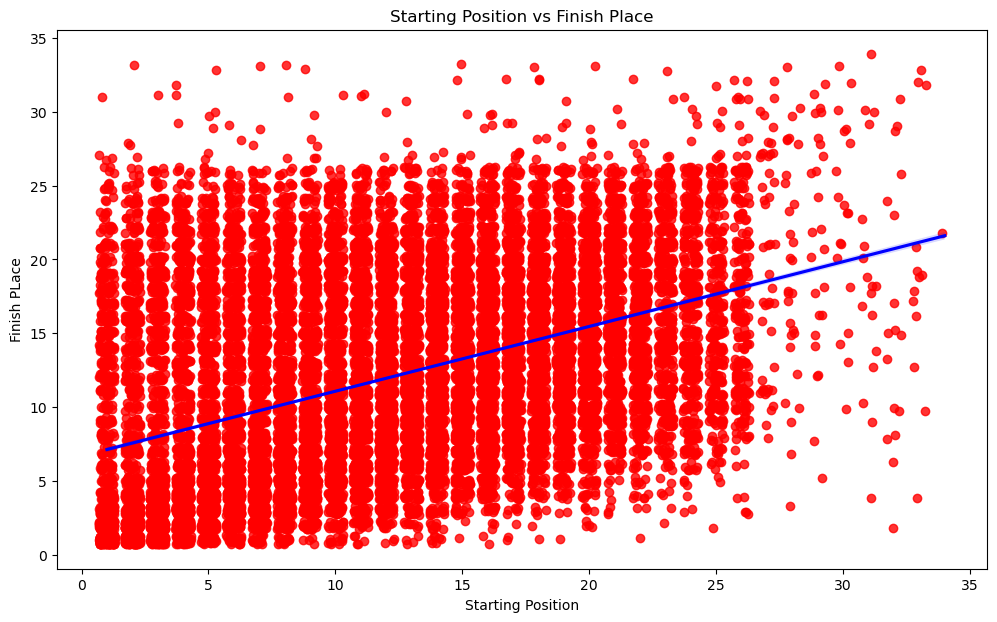

In [46]:
# Creating a Regression Plot for Starting Place to Finishing Place
plt.figure(figsize= [12,7])
sb.regplot(data= dfnozero, x= 'grid', y= 'positionOrder', x_jitter = 0.3, y_jitter= 0.3, scatter_kws= {"color" : "red"}, line_kws= {"color" : "blue"})
plt.title('Starting Position vs Finish Place')
plt.ylabel('Finish PLace')
plt.xlabel('Starting Position')

Text(0.5, 0.98, 'Average speed amongst all teams during the fastest lap at individual GPs')

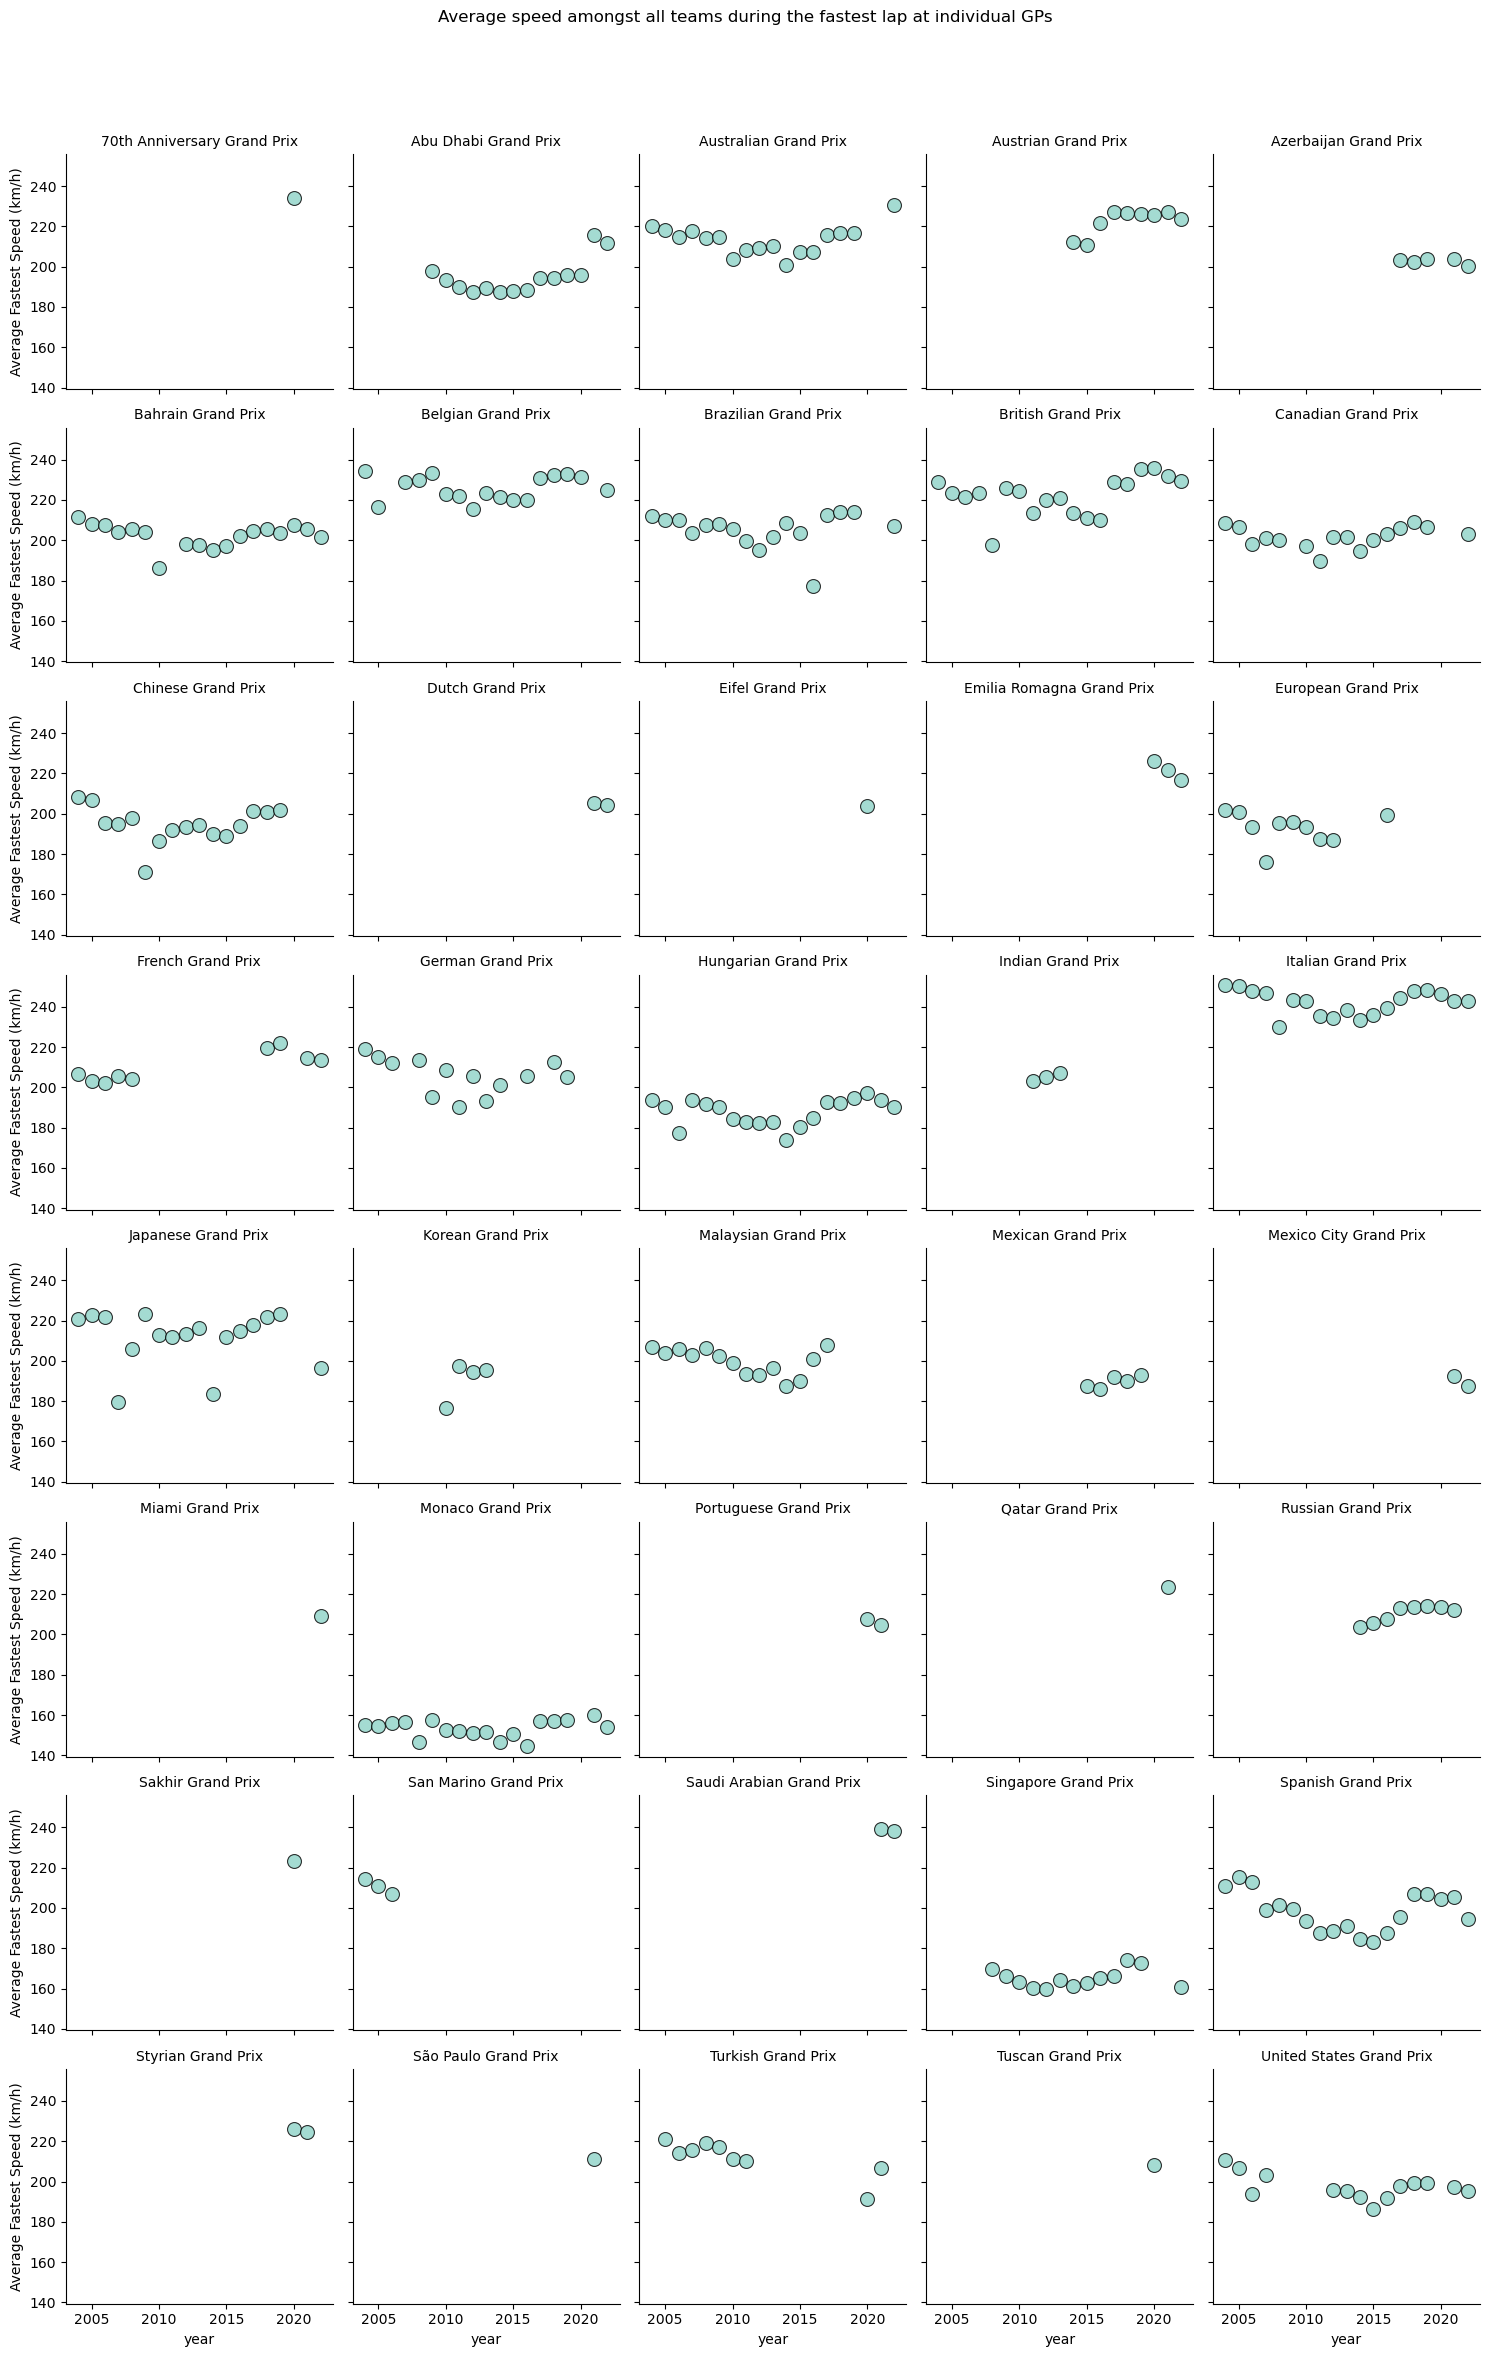

In [47]:
# Create new Data Frama for Seasons 2004 onwards (Speed Data available only after 2004)
dfspeed = df[df['year'] >= 2004]
dfgroupspeed = dfspeed.groupby(['gpName', 'year'])['fastestLapSpeed'].mean().to_frame().reset_index()

# Facetgrid creation
g = sb.FacetGrid(data= dfgroupspeed , col= 'gpName', col_wrap= 5)
g.map(plt.scatter, 'year', 'fastestLapSpeed', alpha = 0.8, linewidth= 0.8, edgecolor= "black", s=100)
g.set_titles("{col_name}")
g.set_xlabels('year')
g.set_ylabels('Average Fastest Speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual GPs')